## 6.2. Basit Lineer Regresyon - Odev

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

baslik_font = {'family':'arial','color':'darkred','weight':'bold','size':15}
eksen_font = {'family':'arial','color':'darkblue','weight':'bold','size':10}

In [2]:
# Bu veri kümesi, Ames/Iowa'da ki konutların birçok yönünü açıklayan 79 değişkenden oluşmaktadır. 
# Göreviniz bu verileri kullanarak, evlerin fiyatlarını tahmin etmek olacak. 

# train veri setinde price bilgisi oldugu icin o dosyayi kullaniyoruz.
ev = pd.read_csv('house_prices_train.csv')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
ev.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# 1. Verileri inceleyin ve gerekli tüm verileri temizleyin

print(ev.shape)

(1460, 81)


In [4]:
# kayip veri olup olmadigini kontrol edelim ve yuksek oranda kayip verisi olan sutunlari veri setimizden cikaralim

ev.isnull().sum()/ev.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [5]:
ev = ev.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley','LotFrontage'], axis = 1)

In [6]:
# kalan sutunlarin bazilarinda kayip veri var ancak oranlari cok dusuk oldugu icin o satirlari da cikardim.
ev = ev.dropna()

In [7]:
# elimizde kalan veriye bakalim
print(ev.shape)

(1338, 75)


In [8]:
# 2. Verileri araştırın ve konut fiyatlarının tahmininde faydalı olacağını düşündüğünüz bazı değişkenleri bulun.

ev.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Text(0, 0.5, 'Ev sayisi')

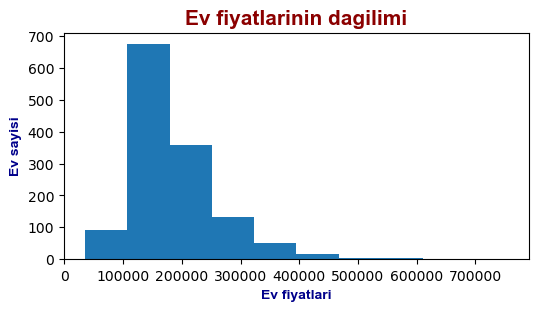

In [9]:
plt.figure(figsize=(6,3), dpi=100)
plt.hist(ev.SalePrice)
plt.title('Ev fiyatlarinin dagilimi', fontdict=baslik_font)
plt.xlabel('Ev fiyatlari', fontdict=eksen_font)
plt.ylabel('Ev sayisi', fontdict=eksen_font)

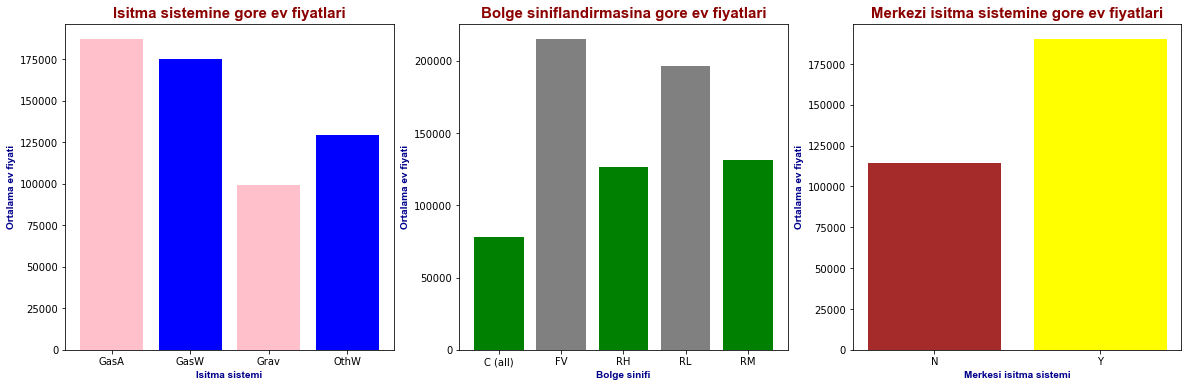

In [10]:
# bazi kategorik degiklenlerin ortalama ev fiyatlarina bakalim

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.bar(ev.groupby('Heating')['SalePrice'].mean().index,
        ev.groupby('Heating')['SalePrice'].mean(),
        color = ('pink', 'blue'))
plt.title('Isitma sistemine gore ev fiyatlari', fontdict=baslik_font)
plt.xlabel('Isitma sistemi', fontdict=eksen_font)
plt.ylabel('Ortalama ev fiyati', fontdict=eksen_font)

plt.subplot(1,3,2)
plt.bar(ev.groupby('MSZoning')['SalePrice'].mean().index,
        ev.groupby('MSZoning')['SalePrice'].mean(),
        color = ('green','grey'))
plt.title('Bolge siniflandirmasina gore ev fiyatlari', fontdict=baslik_font)
plt.xlabel('Bolge sinifi', fontdict=eksen_font)
plt.ylabel('Ortalama ev fiyati', fontdict=eksen_font)

plt.subplot(1,3,3)
plt.bar(ev.groupby('CentralAir')['SalePrice'].mean().index,
        ev.groupby('CentralAir')['SalePrice'].mean(),
        color = ('brown','yellow'))
plt.title('Merkezi isitma sistemine gore ev fiyatlari', fontdict=baslik_font)
plt.xlabel('Merkesi isitma sistemi', fontdict=eksen_font)
plt.ylabel('Ortalama ev fiyati', fontdict=eksen_font)

plt.show()

In [18]:
# Degiskenlerin buyuk bir kisminin ev fiyatlarinda etkili oldugunu dusunuyorum. Yine de bir kismini analiz icin 
# birakacagim. Asagidaki degiskenleri analiz icin sectim. Ilk uc tanesi kategorik olduklari icin oncelikle
# onlari sayisal degerlere donusturecegim.

# MSZoning: The general zoning classification
# Heating: Type of heating
# CentralAir: Central air conditioning
# TotalBsmtSF: Total square feet of basement area
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# BedroomAbvGr: Number of bedrooms above basement level
# GarageArea: Size of garage in square feet

In [12]:
ev = ev[['MSZoning','Heating','CentralAir','TotalBsmtSF','1stFlrSF','2ndFlrSF','BedroomAbvGr','GarageArea','SalePrice']]

In [13]:
ev = pd.concat([ev, pd.get_dummies(ev['Heating'],drop_first = True)], axis = 1)
ev = pd.concat([ev, pd.get_dummies(ev['MSZoning'],drop_first = True)], axis = 1)
ev['CentralAir'] = ev.CentralAir.replace({'Y':1, 'N':0})

In [14]:
ev = ev.drop(['MSZoning','Heating'], axis = 1)

In [15]:
ev.head()

,CentralAir,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,GarageArea,SalePrice,GasW,Grav,OthW,FV,RH,RL,RM
0,1,856,856,854,3,548,208500,0,0,0,0,0,1,0
1,1,1262,1262,0,3,460,181500,0,0,0,0,0,1,0
2,1,920,920,866,3,608,223500,0,0,0,0,0,1,0
3,1,756,961,756,3,642,140000,0,0,0,0,0,1,0
4,1,1145,1145,1053,4,836,250000,0,0,0,0,0,1,0


In [16]:
# Bu özellikleri kullanarak ilk modelinizi oluşturun ve OLS kullanarak parametreleri tahmin edin.

Y = ev['SalePrice']
X = ev[['CentralAir','TotalBsmtSF','1stFlrSF','2ndFlrSF','BedroomAbvGr','GarageArea','GasW','Grav','OthW',
       'FV','RH','RL','RM']]

In [17]:
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 24 Feb 2021   Prob (F-statistic):          4.94e-324
Time:                        21:59:30   Log-Likelihood:                -16204.
No. Observations:                1338   AIC:                         3.244e+04
Df Residuals:                    1324   BIC:                         3.251e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.577e+04    1.7e+04     -4.467      0.000   -1.09e+05   -4.25e+04
CentralAir    2.802e+04   6722.437      4.168      0.000    1.48e+04    4.12e+04
TotalBsmtSF     47.2632      6.867      6.883      0.000      33.793      60.734
1stFlrSF        76.5361      7.262     10.539      0.000      62.289      90.783
2ndFlrSF        92.6296      3.583     25.855      0.000      85.601      99.658
BedroomAbvGr -1.718e+04   1933.718     -8.884      0.000    -2.1e+04   -1.34e+04
GarageArea      89.5419      8.152     10.984      0.000      73.550     105.534
GasW         -7619.4317   1.19e+04     -0.643      0.521   -3.09e+04    1.56e+04
Grav           1.35e+04   2.65e+04      0.509      0.611   -3.85e+04    6.55e+04
OthW          -3.12e+04   4.48e+04     -0.697      0.486   -1.19e+05    5.67e+04
FV            7.836e+04    1.7e+04      4.617      0.000    4.51e+04    1.12e+05
RH            5.154e+04   2.07e+04      2.495      0.013     1.1e+04    9.21e+04
RL            6.871e+04   1.61e+04      4.263      0.000    3.71e+04       1e+05
RM            4.543e+04   1.62e+04      2.805      0.005    1.37e+04    7.72e+04
==============================================================================
Omnibus:                      933.340   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134061.602
Skew:                          -2.302   Prob(JB):                         0.00
Kurtosis:                      51.821   Cond. No.                     6.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""